## Chapter 4 Applied Exercises

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns  

from matplotlib.pyplot import subplots
from pandas.plotting import scatter_matrix
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
            QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [57]:
Weekly = load_data('Weekly')
print(Weekly) 

Weekly.columns

      Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
...    ...    ...    ...    ...    ...    ...       ...    ...       ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969        Up
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281        Up
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283        Up
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034        Up
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069        Up

[1089 rows x 9 columns]


Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

#### 13.(a) 
Examining the **Weekly** data with `.describe()`, `.corr()`, drawing plots with `scatter_matrix`

In [58]:
Weekly.iloc[:, 1:].describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


Matrix of Correlations
            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


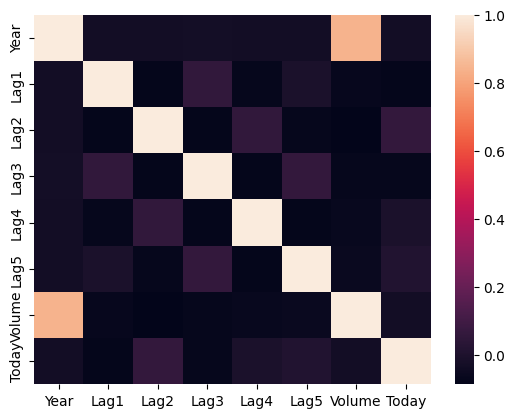

In [59]:

Cor = Weekly.corr(numeric_only=True)
sns.heatmap(Weekly.iloc[:,:-1].corr(numeric_only=True))

print("Matrix of Correlations")
print(Cor)



From the `.corr()` correlation matrix, the correlation between `Year` and `Volume` is observed to be positive. 

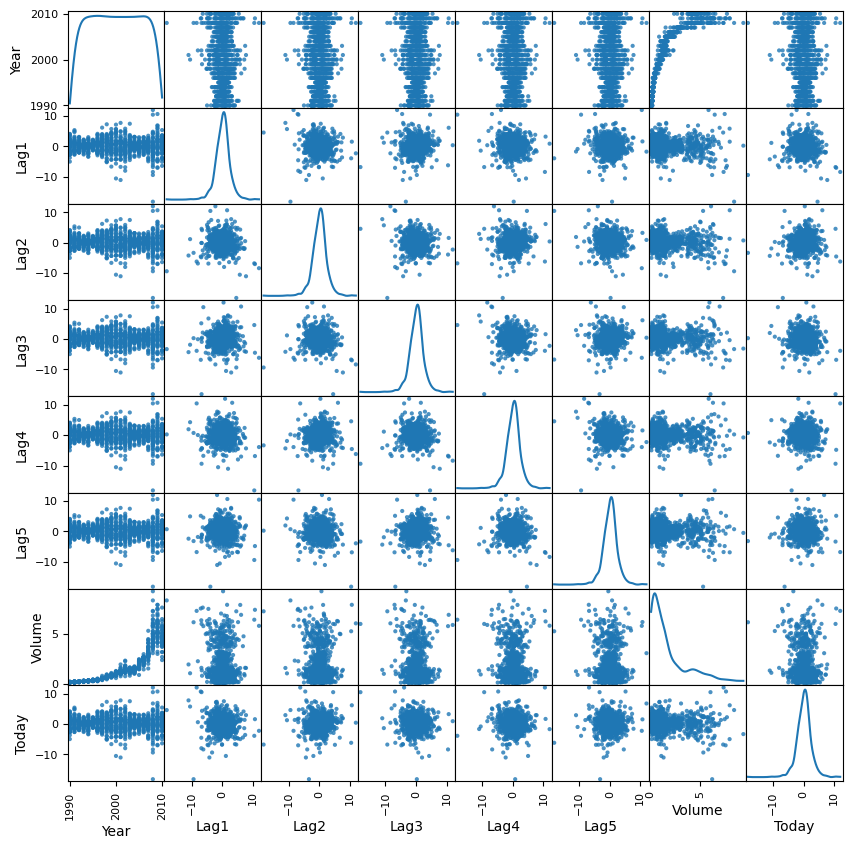

In [60]:
scatter_matrix(Weekly, alpha=0.8, figsize=(10, 10), diagonal='kde');


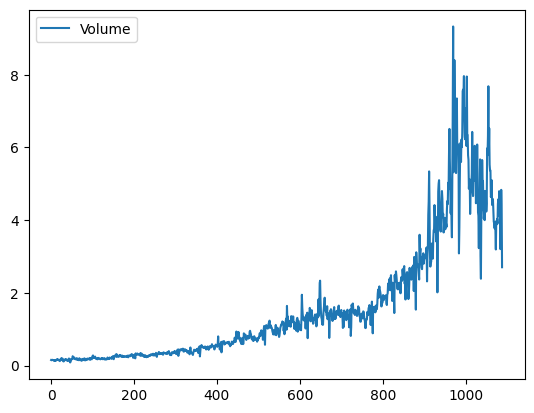

In [61]:
Weekly.plot(y='Volume');


In [62]:
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)

X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'

glm = sm.GLM(y, X, family = sm.families.Binomial())

results = glm.fit()
summarize(results)
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Fri, 29 Nov 2024   Deviance:                       1486.4
Time:                        15:43:50   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.0

#### 13.(b)
**Lag 3**, **Lag 5** and **Volume** has the highest *p*-values. Lag 2 appears to be statistically significant.

In [63]:
probs = results.predict()
labels = np.array(['Down']*1089)
labels[probs>0.5] = "Up"


In [64]:
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [65]:

Accuracy=((557+54)/1089)*100
print(Accuracy)
print(f"Accuray Rate:{(((557+54)/1089)*100):.4f}")

np.mean(labels == Weekly.Direction)


56.10651974288338
Accuray Rate:56.1065


0.5610651974288338

#### 13.(c)
An Accuracy Rate of **56.1%** demonstrates that our model is slightly better than random guessing toin coss of 50/50. 48 weeks were predicted to be 'Down', and 430 weeks were predicted to be 'Up' when the market was down in reality.


In [66]:
train = (Weekly.Year <= 2008)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape
Weekly_test.shape[0]



104

In [67]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

model = MS(['Lag2']).fit(Weekly)
X = model.transform(Weekly)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog = X_test)

labels = np.array(['Down']*(Weekly_test.shape[0]))
labels[probs>0.5] = 'Up'

D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

confusion_table(labels, L_test)


Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [68]:
print(f"Accurate Rate:{(np.mean(labels == L_test)):.3f}")


Accurate Rate:0.625


#### 13.(d)

Designing the model with the statistically significant predictor of `Lag 2`, the accuracy rate had improved to **62.5%** with Logistic Regression.


In [69]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)


Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [70]:
print(f"Accurate Rate:{(np.mean(lda_pred == L_test)):.3f}")


Accurate Rate:0.625


#### 13.(e)
LDA provided an Accuracy Rate of **62.5%.**

In [71]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)


Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [72]:
print(f"Accurate Rate for QDA :{(np.mean(qda_pred == L_test)):.3f}")


Accurate Rate for QDA :0.587


#### 13.(f)
QDA modeling yielded an accuracy rate of **41.30%** while achieved a TPR of 1, however, its overall accuracy rate of **41.30%**  was lower than that of LDA and Logistic Regression. It's essential to consider other metrics like Precision, False Positive Rate and F1-score to evaluate the model's efficiency.

In [73]:
knn1 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)


Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


## How to calculate F1-Score from `confusion_table()`

In [74]:
# Generate confusion matrix
conf_matrix = confusion_table(knn1_pred, L_test)

# Extract values
TP = conf_matrix.loc['Up', 'Up']
TN = conf_matrix.loc['Down', 'Down']
FP = conf_matrix.loc['Down', 'Up']
FN = conf_matrix.loc['Up', 'Down']

# Calculate Precision and Recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score:", f1_score)

F1 Score: 0.5357142857142858


In [75]:
print(f"Accurate Rate for KNN :{(np.mean(knn1_pred == L_test)):.3f}")


Accurate Rate for KNN :0.500


### 13.(g)

Using $K=1$ in K-Nearest Neighbors(KNN) model resulted in a **50%** Accuracy Rate, which is lower than that achieved by both LDA or QDA. This may stemmed from the overly-flexible fit of K-Nearest Neighbor Modeling(KNN) when using such a low value of $K$. Future improvements can be made by trying different value of $K$ to see if Accuracy Rate improve.

In [76]:
NB = GaussianNB()
NB.fit(X_train, L_train)


GaussianNB()

In [77]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [78]:
print(f"Accurate Rate for Naive Bayes :{(np.mean(nb_labels == L_test)):.3f}")


Accurate Rate for Naive Bayes :0.587


### 13.(i)

Out of all methods, Logistic Regerssion and LDA achieved the highest Accuracy Rate of **62.5%** with the predictor `Lag2`. This may suggests that `Lag2` might have a somewhat linear or quasi-linear seperability in relation to dependent variable. 

In [79]:
model = MS(['Lag2','Lag3']).fit(Weekly)
X = model.transform(Weekly)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog = X_test)

labels = np.array(['Down']*(Weekly_test.shape[0]))
labels[probs>0.5] = 'Up'

D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

print(confusion_table(labels, L_test))
print(f"Accurate Rate:{(np.mean(labels == L_test)):.3f}")


Truth      Down  Up
Predicted          
Down          8   4
Up           35  57
Accurate Rate:0.625


In [80]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=['intercept'])for M in [X_train, X_test]]
lda.fit(X_train, L_train)
lda_pred = lda.predict(X_test)
print(confusion_table(lda_pred, L_test))
print(f"Accuracy Rate for LDA: {(np.mean(lda_pred == L_test)):.3f}")


Truth      Down  Up
Predicted          
Down          8   4
Up           35  57
Accuracy Rate for LDA: 0.625


In [81]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)
qda_pred = qda.predict(X_test)
print(confusion_table(qda_pred, L_test))
print(f"Accuracy Rate for QDA: {(np.mean(qda_pred == L_test)):.3f}")


Truth      Down  Up
Predicted          
Down          4   2
Up           39  59
Accuracy Rate for QDA: 0.606


In [82]:
knn1 = KNeighborsClassifier(n_neighbors = 77)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
print(confusion_table(knn1_pred, L_test))
print(f"Accuracy Rate for KNN, K=1: {(np.mean(knn1_pred == L_test)):.3f}")


Truth      Down  Up
Predicted          
Down         10  10
Up           33  51
Accuracy Rate for KNN, K=1: 0.587


In [83]:
NB = GaussianNB()
NB.fit(X_train, L_train)
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)
print(confusion_table(nb_labels, L_test))
print(f"Accuracy Rate for Naive Bayes: {(np.mean(nb_labels == L_test)):.3f}")

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61
Accuracy Rate for Naive Bayes: 0.587


### 13.(J)
The above analysis demonstrated experimentation with `Lag2` and `Lag3` as the predictor variables. Logistic Regression and LDA yielded the highest Accuracy Rate at **62.5%**. Results showed that selected predictors and data may exhibit linear or quasi-linear seperability. With this rate higher than that of QDA's rate at **60.6%**, this indicated that the added flexibiliy of QDA did not lead to an improvement in performanace. KNN with K=77, resulting in an accuracy rate of rate of **58.7%**. The lower performance of KNN, even with a relatively high value of K, further supports the hypothesis that a linear decision boundary is more suitable for this dataset.


### 14.(a)
Creating the binary variable, `Auto['mpg01']` with `.median()` and `np.where()`


In [84]:
Auto = load_data('Auto')
print(Auto) 
Auto.columns

automed= Auto['mpg'].median()


                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   
...                         ...        ...           ...         ...     ...   
ford mustang gl            27.0          4         140.0          86    2790   
vw pickup                  44.0          4          97.0          52    2130   
dodge rampage              32.0          4         135.0          84    2295   
ford ranger                28.0          4         120.0          79    2625   
chevy s-10                 31.0         

In [85]:
Auto['mpg01'] = np.where(Auto['mpg'] > automed, 1, 0)

Matrix of Correlations
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   
mpg01         0.836939  -0.759194     -0.753477   -0.667053 -0.757757   

              acceleration      year    origin     mpg01  
mpg               0.423329  0.580541  0.565209  0.836939  
cylinders        -0.504683 -0.345647 -0.568932 -0.759194  
displacement     -0.543800 -0.369855 -0.614535 -0.753477  
horsepower

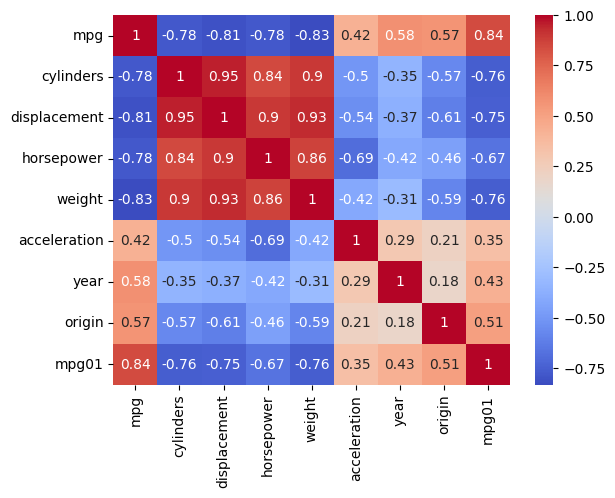

In [86]:

AutoCor = Auto.corr(numeric_only=True)
sns.heatmap(AutoCor, annot=True, cmap='coolwarm')

print("Matrix of Correlations")
print(AutoCor)

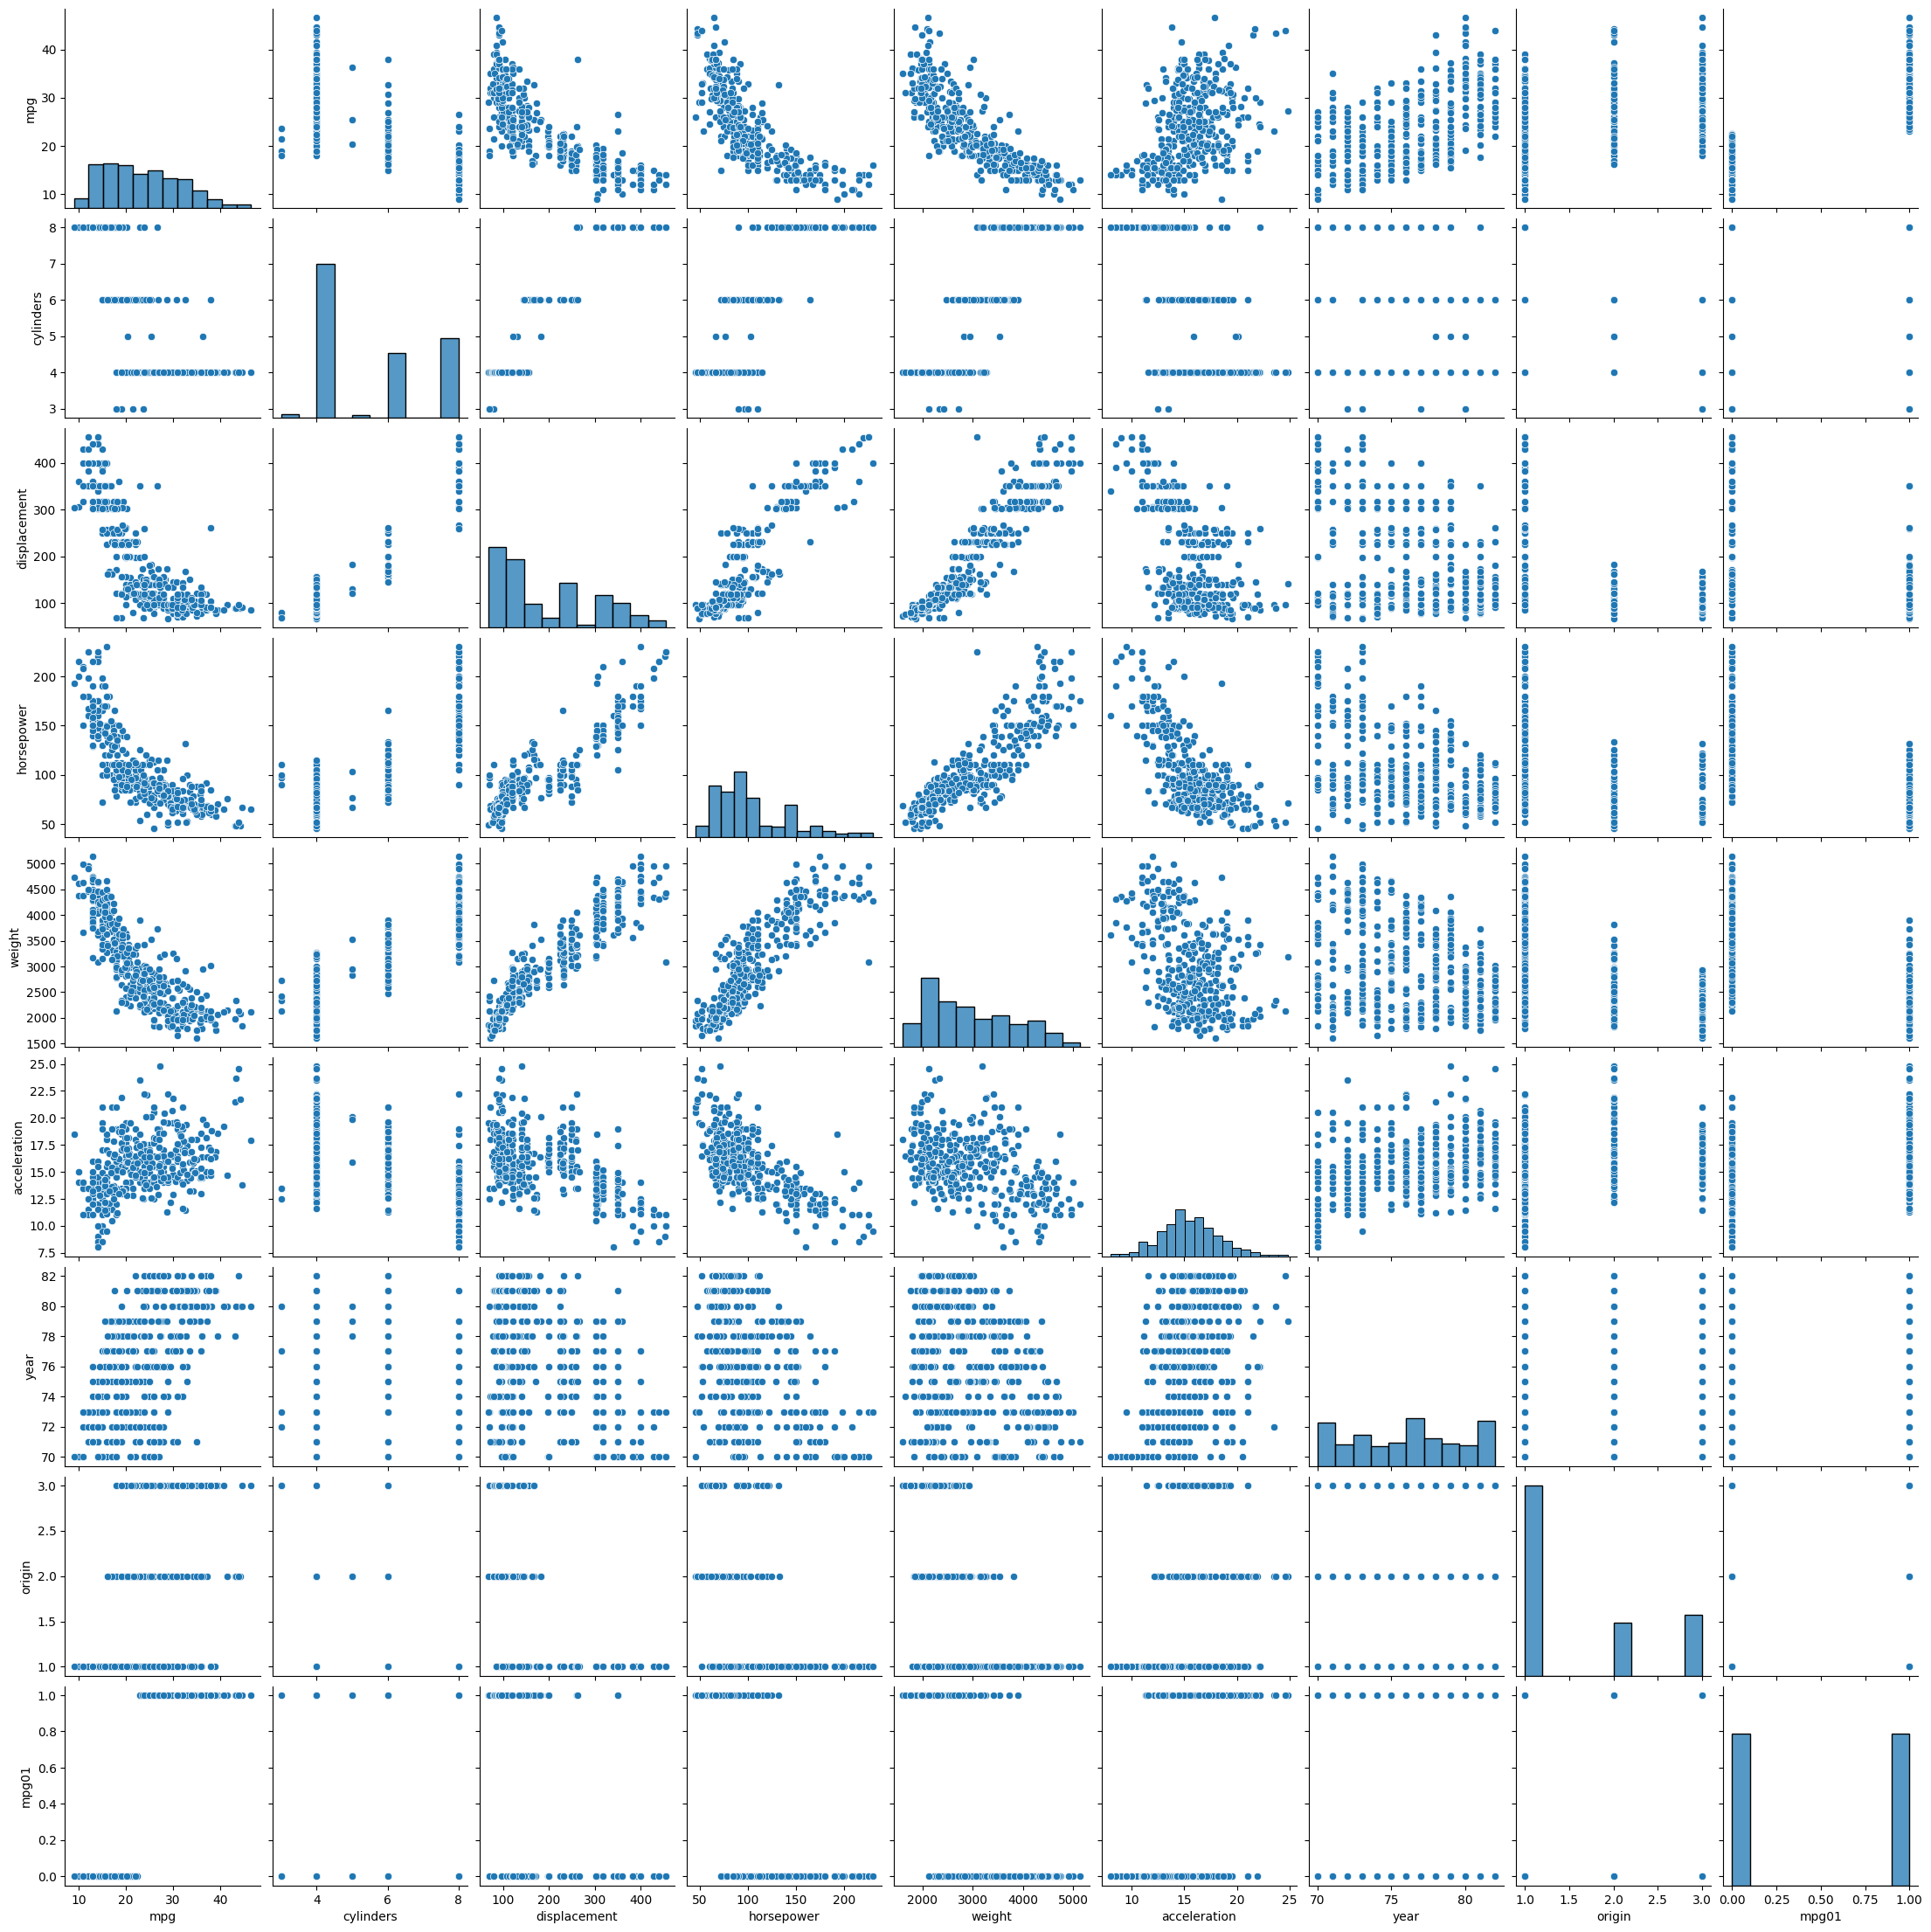

In [87]:
sns.pairplot(Auto);

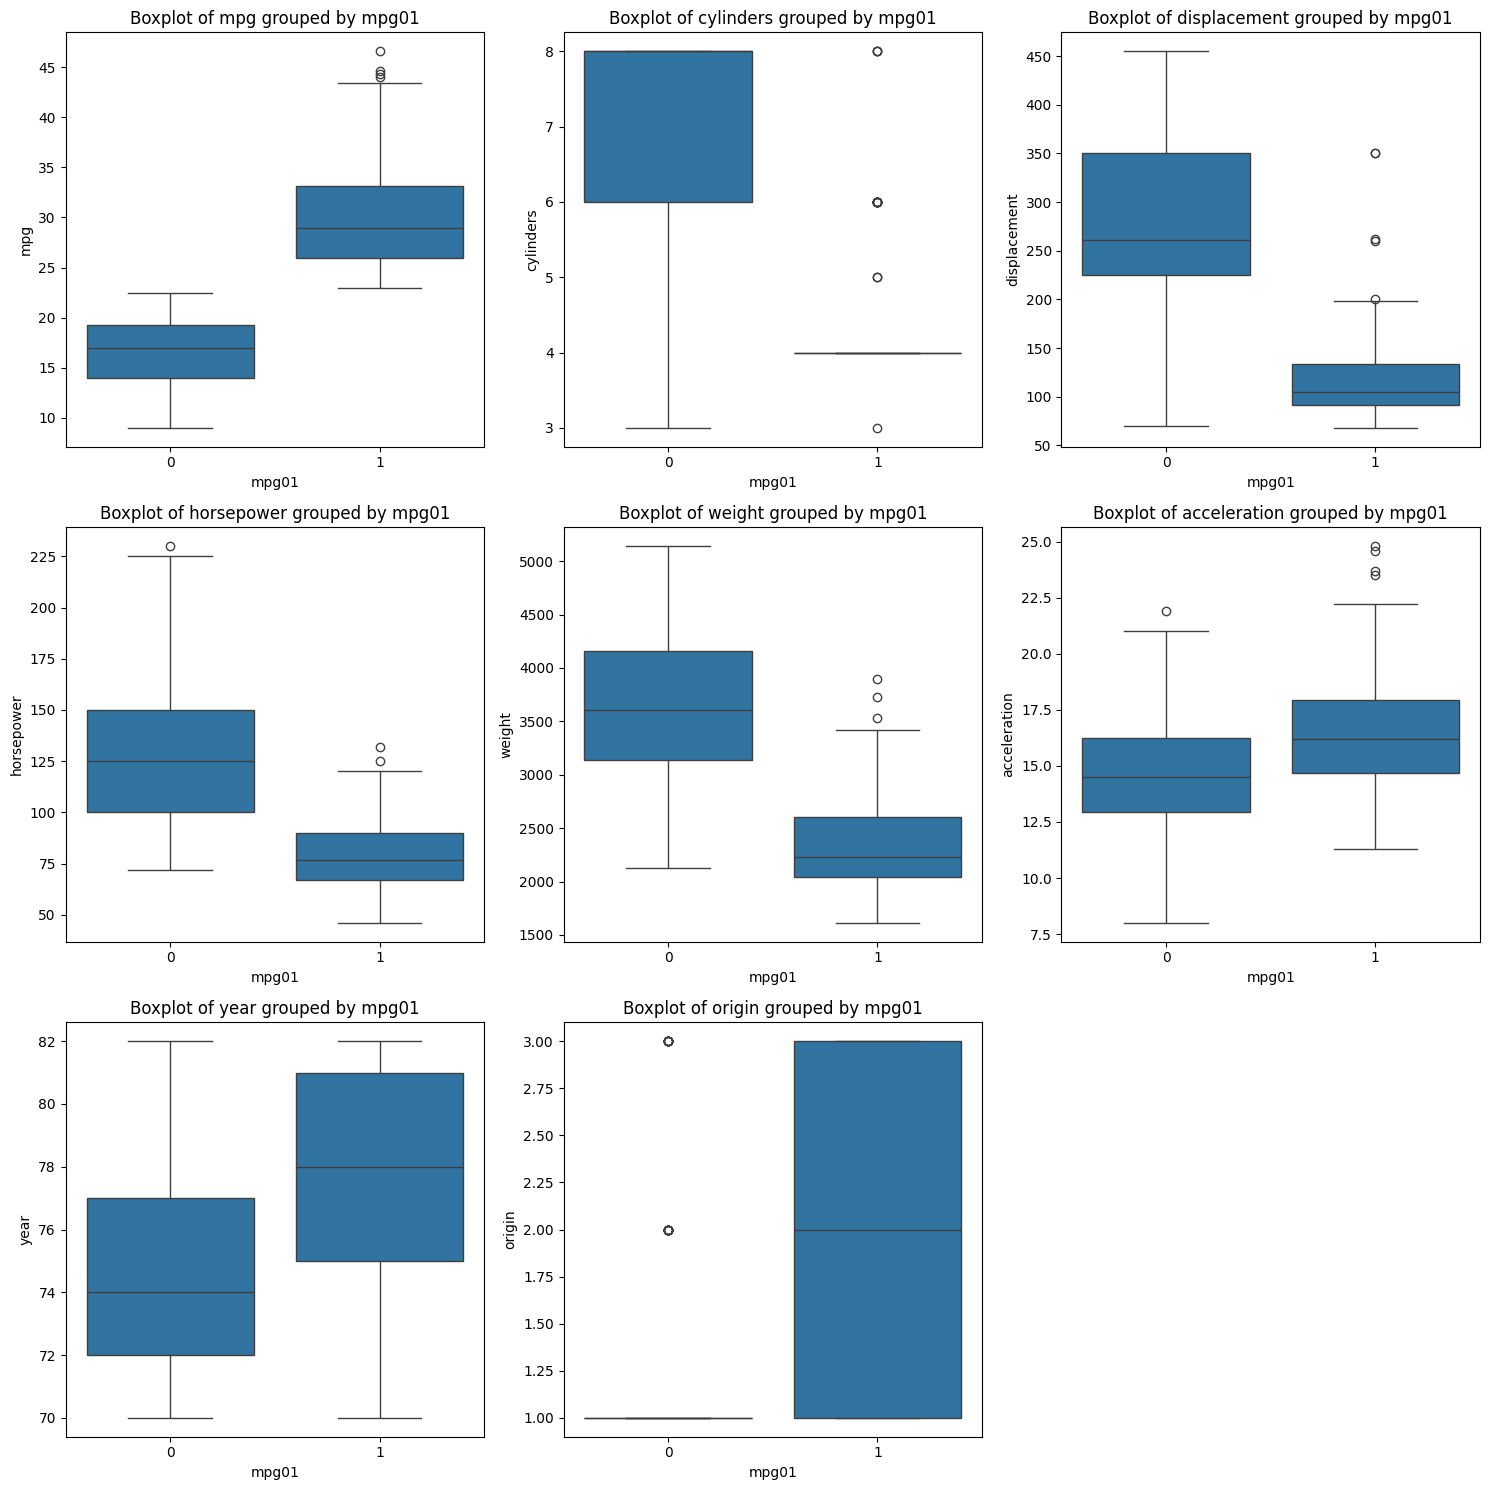

In [88]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(Auto.columns):
    if col != 'mpg01': 
        sns.boxplot(x=Auto['mpg01'], y=Auto[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col} grouped by mpg01')
        axes[i].set_xlabel('mpg01')
        axes[i].set_ylabel(col)
        
axes[8].axis('off')  
axes[8].set_title('')  
plt.tight_layout()
plt.show()

### 14.(b)
Upon examining the correlation matrix, scattermatrix plots, and boxplots, it is evident that predictors such as `cylinders`, `displacement`, and `weight` exhibited strong relationship with `mpg01`. However, it is noted that these relationships are negative, indicating inverse correlations. 

### 14.(c)
Manually splitting the data by using `Auto.sample()` to shuffle the data first, then, with `split_ratio = 0.8`,  splitting 80% of the data from training and 20% of data for testing.

In [89]:

X = Auto[['cylinders', 'displacement', 'weight']]  
y = Auto['mpg01']  

Auto = pd.concat([X, y], axis=1)  # Combine features and target into one DataFrame
data_shuffled = Auto.sample(frac=1, random_state=43).reset_index(drop=True)

split_ratio = 0.8  # 80% for training, 20% for testing
train_size = int(split_ratio * len(data_shuffled))  

train_data = data_shuffled[:train_size]  
test_data  = data_shuffled[train_size:]  

X_train = train_data.drop(columns=['mpg01'])  
y_train = train_data['mpg01']                 

X_test = test_data.drop(columns=['mpg01'])  
y_test = test_data['mpg01']                  



In [90]:
def calculate_metrics(y_true, y_pred):
    ctable = confusion_table(y_true, y_pred)
    
    # Extract TN, FP, FN, TP from the confusion table
    tn = ctable.iloc[0, 0] 
    fp = ctable.iloc[1, 0] 
    fn = ctable.iloc[0, 1]  
    tp = ctable.iloc[1, 1]  
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    error_rate = 1 - accuracy
    
    print("Confusion Table:")
    print(ctable)
    print("Accuracy:", accuracy)
    print("Error Rate:", error_rate)
    return accuracy, error_rate
    

In [91]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

accuracy, error_rate = calculate_metrics(y_test, lda_pred)


Confusion Table:
Truth       0   1
Predicted        
0          29   7
1           3  40
Accuracy: 0.8734177215189873
Error Rate: 0.12658227848101267


### 14.(d)
LDA analysis yielded a **12.66%** of test error of the model. 


In [92]:
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
accuracy, error_rate = calculate_metrics(y_test, qda_pred)


Confusion Table:
Truth       0   1
Predicted        
0          31   5
1           4  39
Accuracy: 0.8860759493670886
Error Rate: 0.11392405063291144


### 14.(e)
QDA analysis yielded a **11.39%** of test error of the model. 

In [93]:
lr = LogisticRegression() #Using LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

accuracy, error_rate = calculate_metrics(y_test, lr_pred)


Confusion Table:
Truth       0   1
Predicted        
0          30   6
1           3  40
Accuracy: 0.8860759493670886
Error Rate: 0.11392405063291144


In [94]:
glm_train = sm.GLM(y_train,   
                   X_train,
                   family=sm.families.Binomial())    #using GLM

results = glm_train.fit()
probs = results.predict(X_test)

labels = np.zeros(len(test_data))  
labels[probs > 0.5] = 1  

accuracy, error_rate = calculate_metrics(y_test, labels)


Confusion Table:
Truth      0.0  1.0
Predicted          
0.0         30    6
1.0          6   37
Accuracy: 0.8481012658227848
Error Rate: 0.15189873417721522


### 14.(f)
Logistic Regression Model yielded a **15.20%** of test error rate.

In [95]:
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_pred = NB.predict(X_test)
accuracy, error_rate = calculate_metrics(y_test, nb_pred)


Confusion Table:
Truth       0   1
Predicted        
0          30   6
1           4  39
Accuracy: 0.8734177215189873
Error Rate: 0.12658227848101267


### 14.(g)
Naive Bayes yielded a **12.66%** of test error rate from the model

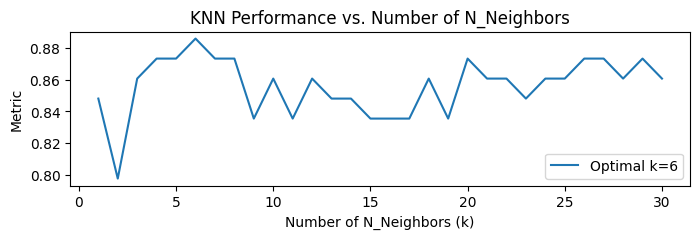

Optimized nearest neighbor, K: 6
Confusion Table:
Truth       0   1
Predicted        
0          28   8
1           1  42
Accuracy: 0.8860759493670886
Error Rate: 0.11392405063291144


In [97]:
from contextlib import redirect_stdout
import io

fig, ax = plt.subplots(figsize=(8, 2))

neighbors_range = range(1, 31)  
accuracies = []; 
error_rates = [];  

for i in neighbors_range:
    with io.StringIO() as f, redirect_stdout(f):
        knn = KNeighborsClassifier(i)
        knn_pred = knn.fit(X_train, y_train).predict(X_test)
        accuracy, error_rate = calculate_metrics(y_test, knn_pred)
    
    accuracies.append(accuracy)
    error_rates.append(error_rate)

K = accuracies.index(max(accuracies))+1
plt.plot(neighbors_range, accuracies, label=f"Optimal k={K}")
plt.xlabel('Number of N_Neighbors (k)')
plt.ylabel('Metric')
plt.title('KNN Performance vs. Number of N_Neighbors')
plt.legend()
plt.show()

print(f"Optimized nearest neighbor, K: {K}")

knn = KNeighborsClassifier(n_neighbors = K)
knn_pred = knn.fit(X_train, y_train).predict(X_test)
accuracy, error_rate = calculate_metrics(y_test, knn_pred)


### 14.(h)
Finding an optimal k nearest neighbor of `k=6`, model yielded a **11.39%** of test error rate from the model.

### 15.(a)

In [98]:
def Power():
  result = 2**3
  print(f"Result for Exercise 15.(a): {result}")

Power()

Result for Exercise 15.(a): 8


### 15.(b)

In [99]:
def Power2(x, a):
  result = x**a
  print(f"Result {x} raise to the power of {a}: {result}")
Power2(3,8)

Result 3 raise to the power of 8: 6561


### 15.(c)

In [100]:
Power2(10,3)
Power2(8,17)
Power2(131,3)


Result 10 raise to the power of 3: 1000
Result 8 raise to the power of 17: 2251799813685248
Result 131 raise to the power of 3: 2248091


### 15.(d)

In [101]:
class PowerClass:
    def __init__(self,base,exponent,result):
        self.base=base
        self.exponent=exponent
        self.result = result  #store result

def Power3(x, a): #Class Method
    
            result = x ** a #Compute power 
            return PowerClass(base=x, exponent=a, result=result)    

#Testing
print(Power3(2,4).result)


16


### 15.(e)

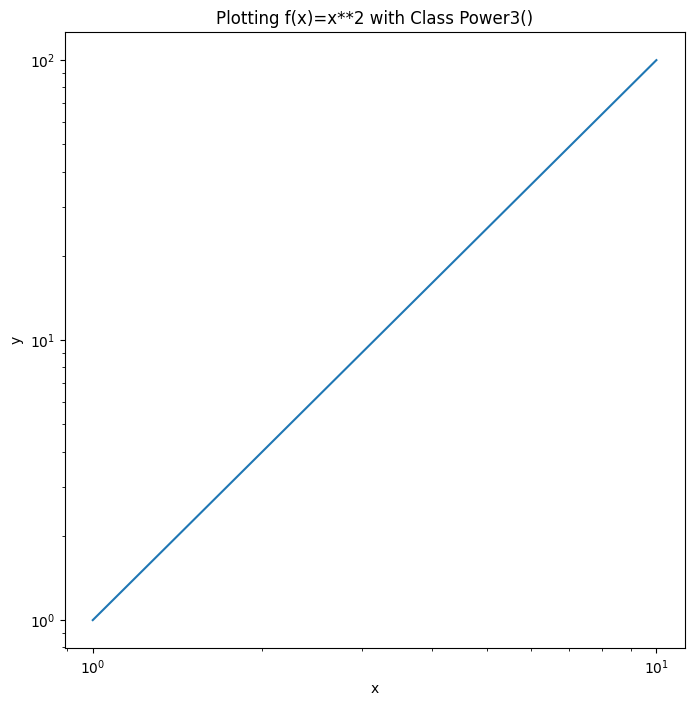

100


In [102]:
fig, ax = plt.subplots(figsize=(8, 8))

x = np.arange(1,11)   
ys = []   

for i in x:
    y = Power3(i,2)
    ys.append(y.result)
 
ax.set_yscale('log') #Setting Log y-scale
ax.set_xscale('log')
plt.plot(x, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plotting f(x)=x**2 with Class Power3()')
plt.show()

print(y.result)

### 15.(f)

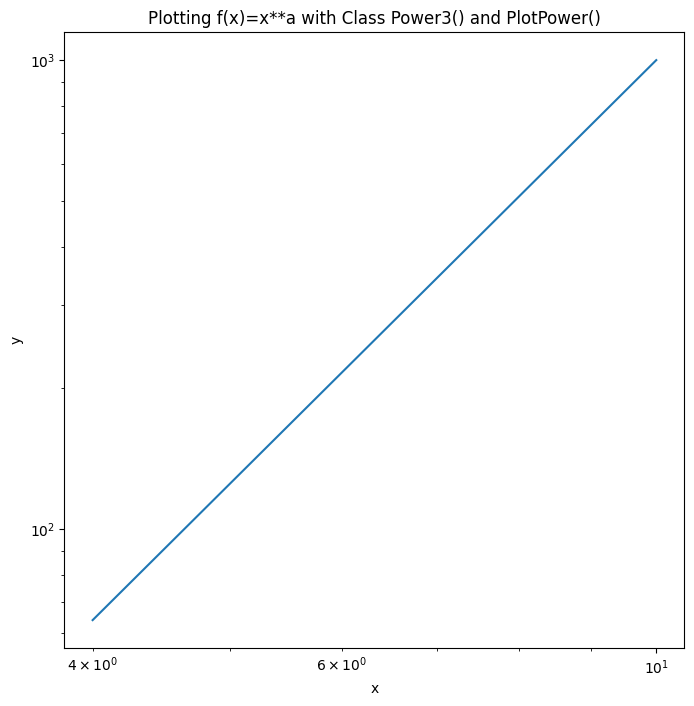

In [103]:
def PlotPower(x, a):
        fig, ax = plt.subplots(figsize=(8, 8))
        ys = []
        for i in x:
            y = Power3(i, a)
            ys.append(y.result)
        
        plt.plot(x, ys)
        
        ax.set_yscale('log') #Setting Log y-scale
        ax.set_xscale('log')
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Plotting f(x)=x**a with Class Power3() and PlotPower()')
        return plt.show()

PlotPower(np.arange(4, 11), 3)


In [104]:
Boston = load_data('Boston')
print(Boston.dtypes)

cr_mthresh = Boston['crim'].median()
print('Crime Rate Median Threshold:', cr_mthresh)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object
Crime Rate Median Threshold: 0.25651


In [106]:

Boston['cr_med'] = np.where(Boston['crim'] > cr_mthresh, 1, 0)


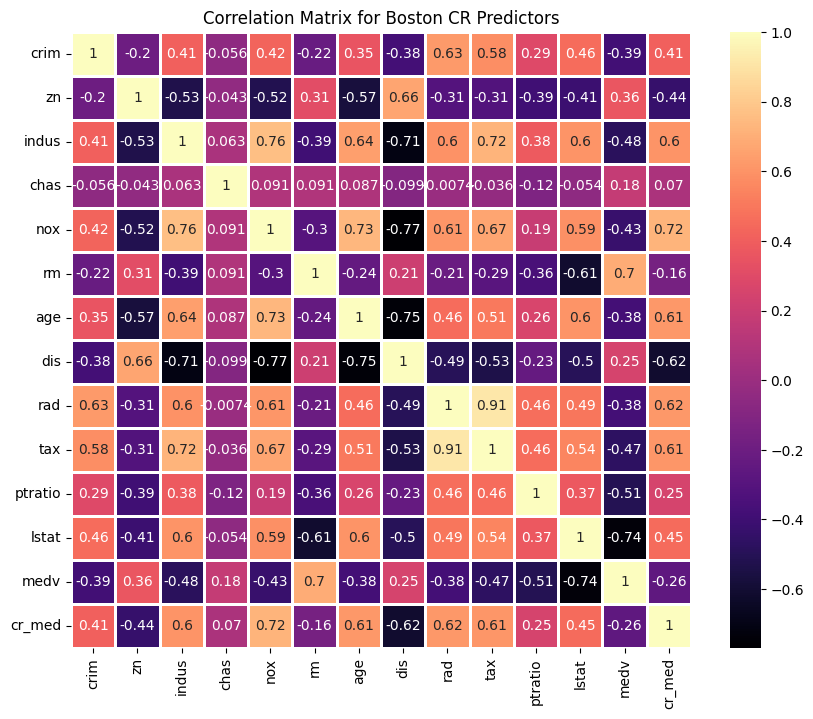

Correlation matrix for Boston Predictors:
             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501

In [108]:
correlation_matrix = Boston.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.75)

plt.title('Correlation Matrix for Boston CR Predictors')

plt.show()

print(f"Correlation matrix for Boston Predictors:\n{correlation_matrix}")

In [109]:

X = Boston[['nox', 'dis', 'tax','age','rad']]  
y = Boston['cr_med']  


Boston = pd.concat([X, y], axis=1)  # Combine features and target into one DataFrame
data_shuffled = Boston.sample(frac=1, random_state=27).reset_index(drop=True)

split_ratio = 0.8  # 80% for training, 20% for testing
train_size = int(split_ratio * len(data_shuffled))  # Calculate the index for splitting

train_data = data_shuffled[:train_size]  # Training data
test_data  = data_shuffled[train_size:]  # Test data

X_train = train_data.drop(columns=['cr_med'])  # Features for training
y_train = train_data['cr_med']                 # Target for training

X_test = test_data.drop(columns=['cr_med'])    # Features for testing
y_test = test_data['cr_med']                   # Target for testing

print(X_train.head())
# print(y_train)
# print(X_test)
# print(y_test)

     nox     dis  tax    age  rad
0  0.679  1.8629  666   78.7   24
1  0.647  2.1121  264   81.8    5
2  0.547  2.4631  432   88.2    6
3  0.693  1.4896  666  100.0   24
4  0.624  2.2710  437   97.7    4


In [110]:
glm_train = sm.GLM(y_train,   
                   X_train,
                   family=sm.families.Binomial())    #using GLM

results = glm_train.fit()
probs = results.predict(X_test)

labels = np.zeros(len(test_data))  
labels[probs > 0.5] = 1  

accuracy, error_rate = calculate_metrics(y_test, labels)


Confusion Table:
Truth      0.0  1.0
Predicted          
0.0         46    8
1.0         15   33
Accuracy: 0.7745098039215687
Error Rate: 0.22549019607843135


### 16.(a) 
Logistic Regression modeling yielded a result of **77.45%** for Accuracy Rate and a **22.54%**. Test Errors Rate. 

In [111]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

accuracy, error_rate = calculate_metrics(y_test, lda_pred)


Confusion Table:
Truth       0   1
Predicted        
0          53   1
1          17  31
Accuracy: 0.8235294117647058
Error Rate: 0.17647058823529416


### 16.(b) 
Linear Discriminant Analysis (LDA) modeling yield a result of **82.35%** for Accuracy Rate and a **17.65%** Test Errors Rate

In [112]:
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
accuracy, error_rate = calculate_metrics(y_test, qda_pred)

Confusion Table:
Truth       0   1
Predicted        
0          53   1
1          18  30
Accuracy: 0.8137254901960784
Error Rate: 0.18627450980392157


### 16.(c) 
Quadratic Discriminant Analysis (QDA) modeling yielded a result of **81.37%** for Accuracy Rate and a **17.65%** Test Errors Rate, same as the above LDA Model.

In [113]:
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_pred = NB.predict(X_test)
accuracy, error_rate = calculate_metrics(y_test, nb_pred)

Confusion Table:
Truth       0   1
Predicted        
0          51   3
1          15  33
Accuracy: 0.8235294117647058
Error Rate: 0.17647058823529416


### 16.(d) 
Naive Bayes modeling yielded a result of **85.82%** for Accuracy Rate and a **14.17%** Test Errors Rate

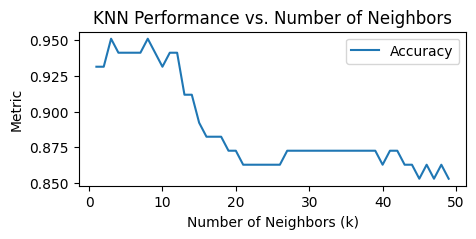

Optimized nearest neighbor, K: 3
Confusion Table:
Truth       0   1
Predicted        
0          53   1
1           4  44
Accuracy: 0.9509803921568627
Error Rate: 0.0490196078431373
Null Rate: 0.5294117647058824


In [114]:
fig, ax = plt.subplots(figsize=(5, 2))

neighbors_range = range(1, 50)  
accuracies = []  
error_rates = []  
best_knn_pred = []  
max_accuracy = 0  # initial value for max_acc
optimal_k = 0     # To store the k corresponding to max accuracy

for i in neighbors_range:
  with io.StringIO() as f, redirect_stdout(f):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    accuracy, error_rate = calculate_metrics(y_test, knn_pred)
    
    accuracies.append(accuracy)
    error_rates.append(error_rate)

    # Store predictions and optimal k dynamically
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimal_k = i
        best_knn_pred = knn_pred  # Store the predictions for optimal k

# Plot results
plt.plot(neighbors_range, accuracies, label='Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metric')
plt.title('KNN Performance vs. Number of Neighbors')
plt.legend()
plt.show()

# Display optimal k
print(f"Optimized nearest neighbor, K: {optimal_k}")
accuracy, error_rate = calculate_metrics(y_test, best_knn_pred)
print( f'Null Rate:', np.mean(y_test == 0))


### 16.(e) 
KNN model with `optimal_k` yielded a result of **95.10%** for Accuracy Rate and a **4.901%** Test Errors Rate.

Class 0 is the majority class and **52.94%** is the *Null Rate*. Since the Accuracy Rate is **95.10%**, the model predicts better than always predicting the majority class.

In [116]:
scaler = StandardScaler()

feature_std = scaler.fit_transform(X)


test_size =  0.20 # % of the data for testing

(X_train, X_test, y_train, y_test) = train_test_split(np.asarray(feature_std),
                                                     y, test_size = test_size,
                                                     random_state = 0)

neighbors_range = range(1, 50)  
best_knn_pred = []  
max_accuracy = 0  # initial value for max_acc
optimal_k = 0     # To store the k corresponding to max accuracy

for i in neighbors_range:
  with io.StringIO() as f, redirect_stdout(f):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    accuracy, error_rate = calculate_metrics(y_test, knn_pred)
    
    accuracies.append(accuracy)
    error_rates.append(error_rate)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimal_k = i
        best_knn_pred = knn_pred  # Store the predictions for optimal k

print('optimal_k: ',optimal_k)
accuracy, error_rate = calculate_metrics(y_test, best_knn_pred)


optimal_k:  1
Confusion Table:
Truth       0   1
Predicted        
0          49   2
1           3  48
Accuracy: 0.9509803921568627
Error Rate: 0.0490196078431373


### 16.(f) 
KNN models with `optimal_k` yielded a result of **95.10%** for Accuracy Rate and a **4.901%** Test Errors Rate for both unscaled and scaled data.

